# Support Vector Machines

In [1]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

## Dataset: Social Network Ads

The original dataset can be found at Kaggle ([Social Network Ads](https://www.kaggle.com/rakeshrau/social-network-ads)).

## Importing the datasets

In [5]:
df = pd.read_csv('Social_Network_Ads.csv')
X = df.iloc[:, [2,3]].values
y = df.iloc[:, 4].values

In [6]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Splitting the dataset into the Training set and Test set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [8]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Fitting the classifier into the Training set

In [9]:
clf = SVC(kernel = 'linear', random_state = 0)
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

## Predicting the test set results

In [10]:
y_pred = clf.predict(X_test)

## Making the Confusion Matrix

In [15]:
confusion_matrix(y_test, y_pred)

array([[66,  2],
       [ 8, 24]])

## Visualization

In [21]:
def visualize(features, target, title):
    X_set, y_set = features, target
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                                   stop = X_set[:, 0].max() + 1,
                                   step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1,
                                   stop = X_set[:, 1].max() + 1,
                                   step = 0.01))
    plt.contourf(X1,
                 X2,
                 clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75,
                 cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0],
                    X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)

        plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

### Visualising the Training set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


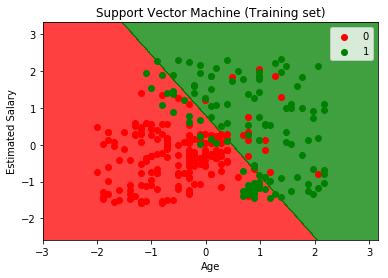

In [13]:
visualize(X_train, y_train, 'Support Vector Machine (Training set)')

### Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


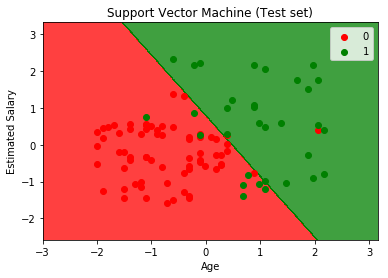

In [14]:
visualize(X_test, y_test, 'Support Vector Machine (Test set)')

As we can see due the linear nature of this classifier the model made some incorrect predictions(10 incorrect predictions as per the confusion matrix and graph). Now let's try to use different kernel type and see if it makes any better predictions.

In [16]:
clf = SVC(kernel='rbf',random_state=0)
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [18]:
y_pred = clf.predict(X_test)

In [19]:
confusion_matrix(y_test, y_pred)

array([[64,  4],
       [ 3, 29]])

## Visualising the Training set results for `'rbf'` kernel

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


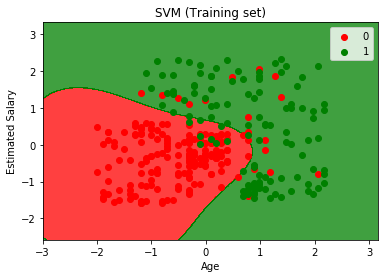

In [22]:
visualize(X_train, y_train, 'SVM (Training set)')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


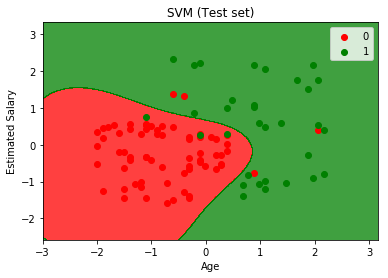

In [23]:
visualize(X_test, y_test, 'SVM (Test set)')

As we can observe from the figure above, the classifier with kernel as rbf made better predictions with only 7 inocrrect predictions. Thus this ia still a better model compared to Logistic regression and K-NN in making useful predictions for the dependant variable.

## Sources

The second part of the note book is based on the work of https://www.kaggle.com/farhanmd29/svm-model-for-social-network-ads.